# Turbo Stage Example
![Axial Turbine](../assets/axial_turb.png)

In [1]:
from typing import List, Optional
import numpy as np
import dataclasses
from parafoil import BSplineAirfoil, TurboRowPassage, TurboStagePassage, TurboMeshParameters



# for attribute_name, attribute_metadata in metadata.items():
#     print(f"Attribute name: {attribute_name}")
#     print(f"Attribute metadata: {attribute_metadata}")


In [4]:
from types import MappingProxyType
from typing import Any, Dict, Sequence
import numpy as np
from parafoil import BSplineAirfoil, TurboRowPassage, TurboStagePassage, TurboMeshParameters
from ezmesh import visualize_mesh
import dataclasses

from parafoil.optimize import get_opt_init, create_opt_class_dict

rotor_airfoil = BSplineAirfoil(
    inlet_angle=np.radians(40.0),
    outlet_angle=np.radians(-20.0),
    stagger_angle=np.radians(-30.0),
    upper_thick_prop=[0.1, 0.15, 0.15, 0.035, 0.01],
    lower_thick_prop=[0.1, 0.15, 0.15, 0.035, 0.01],
    leading_prop=0.5,
    trailing_prop=0.5,
    chord_length=0.0577,
)

stator_airfoil = BSplineAirfoil(
    inlet_angle=np.radians(-40.0),
    outlet_angle=np.radians(30.0),
    stagger_angle=np.radians(30.0),
    upper_thick_prop=[0.035, 0.15, 0.15, 0.035, 0.01],
    lower_thick_prop=[0.035, 0.15, 0.15, 0.035, 0.01],
    leading_prop=0.5,
    trailing_prop=0.5,
    chord_length=0.0577,
)

axial_turbo_passage = TurboStagePassage(
    inflow_passage=TurboRowPassage(
        airfoil=rotor_airfoil,
        spacing_to_chord=1.0,
        leading_edge_gap_to_chord=0.2,
        trailing_edge_gap_to_chord=0.2,
        mesh_params=TurboMeshParameters(
            airfoil_label="wall1",
            bottom_label="periodic1",
            top_label="periodic2",
            inlet_label="inflow",
            outlet_label="outmix",
        )
    ),
    outflow_passage=TurboRowPassage(
        airfoil=stator_airfoil,
        spacing_to_chord=1.0,
        leading_edge_gap_to_chord=0.2,
        trailing_edge_gap_to_chord=0.2,
        mesh_params=TurboMeshParameters(
            airfoil_label="wall2",
            bottom_label="periodic3",
            top_label="periodic4",
            inlet_label="inmix",
            outlet_label="outflow",
        )
    )
)

visualize_mesh(axial_turbo_passage.get_mesh())
# mins, maxs = get_opt_init(axial_turbo_passage, TurboStagePassage)
# class_dict = create_opt_class_dict(axial_turbo_passage, TurboStagePassage, mins)
# print(class_dict)


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Nurb)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Nurb)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 17 (Line)
Info    : [ 20%] Meshing curve 18 (Line)
Info    : [ 20%] Meshing curve 19 (Line)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 30%] Meshing curve 22 (Line)
Info    : [ 30%] Meshing curve 23 (Line)
Info    : [ 30%] Meshing curve 24 (Line)
I

/usr/local/lib/python3.10/site-packages/pythreejs/traits.py:257: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


HTML(value='Coords: ()')

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, far=100000.0, near=0.001, position=(0.0, 0.0, 1.0…

,periodic2
,periodic1
,outmix
,inflow
,wall1
,periodic4
,outflow
,periodic3
,inmix
,wall2
,Zone 0


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Nurb)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Nurb)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 17 (Line)
Info    : [ 20%] Meshing curve 18 (Line)
Info    : [ 20%] Meshing curve 19 (Line)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 30%] Meshing curve 22 (Line)
Info    : [ 30%] Meshing curve 23 (Line)
Info    : [ 30%] Meshing curve 24 (Line)
I

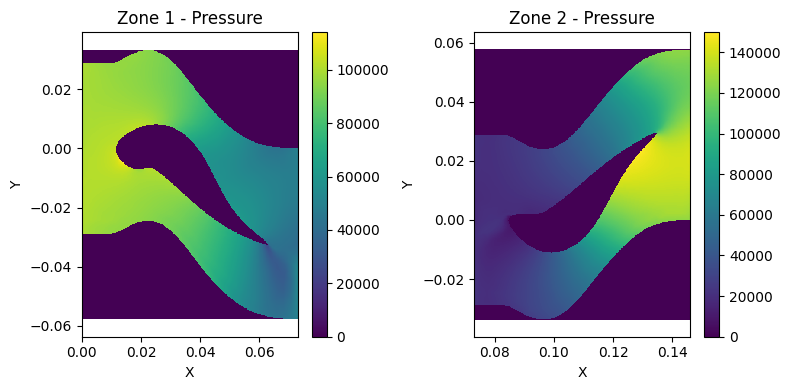

,"""EntropyIn_1[1]""","""EntropyOut_1[1]""",TotalEntahalpyIn_1[1],TotalEnthalpyOut_1[1],TotPressureIn_1[1],TotPressureOut_1[1],"""PressureIn_1[1]""",PressureOut_1[1],"""DensityIn_1[1]""","""DensityOut_1[1]""",...,"""MachIn_2[1]""","""MachOut_2[1]""",AbsFlowAngleIn_2[1],AbsFlowAngleOut_2[1],"""EntropyGen[1]""","""EulerianWork[1]""","""TotStaticEff[1]""","""TotTotEff[1]""","""PRTS[1]""","""PRTT[1]"""
0,3986.200750,3989.681747,290667.7915,293335.6188,103667.8993,105733.62440,95052.09063,89794.59042,1.168874,1.118494,...,0.278738,0.246372,0.410043,-1.459354,0.098864,-18814.15849,135.538817,106.820701,0.849890,0.814692
1,3986.012710,3989.487020,288239.3099,289546.8135,100745.3028,101116.63380,93055.88556,81575.88124,1.151530,1.044689,...,0.145962,0.192934,1.891399,-1.871932,0.092342,-25966.48035,115.470690,104.611363,0.769573,0.749822
2,3985.754457,3988.294597,287928.4511,286300.1043,100457.3115,97622.89599,92945.37125,75489.42041,1.150852,0.989663,...,0.012024,0.178580,-37.170958,-1.471277,0.075028,-27026.89389,112.207251,103.577451,0.755703,0.739047
3,3985.557598,3987.491881,288327.4411,283364.8550,101012.7319,94441.26300,93577.99411,70792.88122,1.156660,0.946107,...,0.204873,0.178210,-1.192034,-0.882160,0.066122,-25712.85626,112.284843,103.295854,0.766084,0.749269
4,3985.392802,3987.532658,288866.1300,280488.3180,101730.6315,91127.72200,94595.26578,66955.42379,1.165806,0.909203,...,0.391468,0.178374,-0.837732,-0.512503,0.063542,-23832.67771,113.166926,103.406109,0.782433,0.765227
5,3985.161952,3988.443564,289372.4214,277546.5419,102435.9729,87560.43955,95934.26367,63645.54366,1.177822,0.876118,...,0.530109,0.172313,-0.175220,-0.478095,0.066004,-22180.05307,113.637466,103.803563,0.796461,0.780102
6,3984.774606,3990.169758,289759.8335,274579.8786,103053.8543,83834.88714,97487.64823,60687.89814,1.191854,0.845426,...,0.627902,0.159306,0.793916,-0.824032,0.077481,-21009.29591,113.691023,104.747165,0.806098,0.791918
7,3984.291322,3992.578482,289896.1717,271716.2152,103396.9077,80150.55904,98910.00115,58000.07827,1.204811,0.816582,...,0.690068,0.141205,2.151985,-1.468272,0.095812,-20468.06403,113.383346,106.099025,0.810083,0.798860
8,3983.958939,3995.246332,289734.4714,269038.4302,103315.5014,76714.01047,99845.33018,55540.24428,1.213328,0.789622,...,0.725741,0.120724,3.763443,-2.555555,0.114812,-20501.65649,112.739866,107.386543,0.808773,0.800563
9,3984.050663,3997.744311,289404.7945,266640.8089,102873.3384,73712.57327,100211.89200,53315.32865,1.216392,0.765020,...,0.743051,0.100280,5.458206,-4.394800,0.126996,-20919.42910,111.678492,108.065686,0.803591,0.797951


In [5]:
from paraflow import run_simulation, get_flasher, ConfigParameters, get_frames, display_frame

flasher = get_flasher("air", "gas")
inlet_total_state = flasher.flash(P=101000, T=288, mach_number=0.396501)
target_outlet_static_state = flasher.flash(P=130000, T=273, mach_number=0.396501, linear_velocity=-100)

sim_results = run_simulation(
    axial_turbo_passage,
    config_params=ConfigParameters(
        inlet_total_state=inlet_total_state, 
        target_outlet_static_state=target_outlet_static_state
    ),
    working_directory="/workspaces/parafoil/simulation_out", 
    id="1",
    auto_delete=False
)
frames = get_frames(
    sim_results, 
    property_names=["Pressure"], 
    num_pnts=500,
)
display_frame(frames, "Pressure")
sim_results.eval_values